# 2º PRUEBA VGG16

In [1]:
import os
import cv2
import seaborn as sn 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import numpy as np
import glob as glob
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
color = 'rgb' #'grayscale' o 'rgb'

escala = 150

In [3]:
def cargar_datos(path1, path2, escala = escala, color = color):
    
    EMD = os.listdir(path1)
    NO_EMD = os.listdir(path2)
    
    data = []
    labels = []

    for i in EMD:   
        image=tf.keras.preprocessing.image.load_img(path1+'/'+i, color_mode= color, 
        target_size= (escala, escala))
        image=np.array(image)
        data.append(image)
        labels.append(1)
    for i in NO_EMD:   
        image=tf.keras.preprocessing.image.load_img(path2+'/'+i, color_mode= color, 
        target_size= (escala, escala))
        image=np.array(image)
        data.append(image)
        labels.append(0)
        
    data = np.array(data)
    labels = np.array(labels)
    
    return data, labels

# 1. TRAIN: OCT / TEST:iPHONE

**DATOS ENTRENAMIENTO**

In [46]:
dataset = cargar_datos('Datos EMD/OCT/EMD', 'Datos EMD/OCT/NO EMD')

In [47]:
train_ds = dataset[0]

In [48]:
train_labels = dataset[1]

In [49]:
print(len(train_ds)==len(train_labels))

True


**DATOS TEST**

In [8]:
dataset = cargar_datos('Datos EMD/iPhone/EMD', 'Datos EMD/iPhone/NO EMD')

In [9]:
test_ds = dataset[0]

In [10]:
test_labels = dataset[1]

In [11]:
print(len(test_ds)==len(test_labels))

True


**OBTENER UN ARRAY CON LAS ETIQUETAS**

In [12]:
print(train_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [50]:
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

In [14]:
print(train_labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

**CLASIFICADOR VGG16**

In [51]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [52]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [17]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

**ENTRENAMIENTO**

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=200, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/200
3/3 [==============================] - 5s 1s/step - loss: 2.2768 - accuracy: 0.7065 - val_loss: 12.6530 - val_accuracy: 0.0417
Epoch 2/200
3/3 [==============================] - 3s 1s/step - loss: 3.3995 - accuracy: 0.6522 - val_loss: 8.9407e-08 - val_accuracy: 1.0000
Epoch 3/200
3/3 [==============================] - 3s 1s/step - loss: 3.5513 - accuracy: 0.8043 - val_loss: 2.9334e-05 - val_accuracy: 1.0000
Epoch 4/200
3/3 [==============================] - 3s 1s/step - loss: 1.2983 - accuracy: 0.7717 - val_loss: 0.1313 - val_accuracy: 0.9583
Epoch 5/200
3/3 [==============================] - 4s 2s/step - loss: 0.5190 - accuracy: 0.8261 - val_loss: 0.5936 - val_accuracy: 0.7500
Epoch 6/200
3/3 [==============================] - 4s 2s/step - loss: 0.4727 - accuracy: 0.8261 - val_loss: 0.0889 - val_accuracy: 0.9167
Epoch 7/200
3/3 [==============================] - 4s 2s/step - loss: 0.2339 - accuracy: 0.9130 - val_loss: 0.1968 - val_accuracy: 0.9167
Epoch 8/200
3/3 [========

**MÉTRICAS ENTRENAMIENTO**

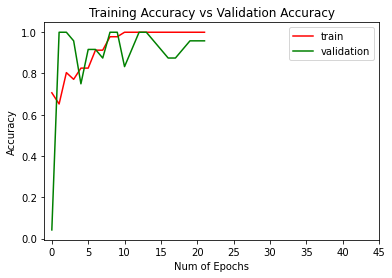

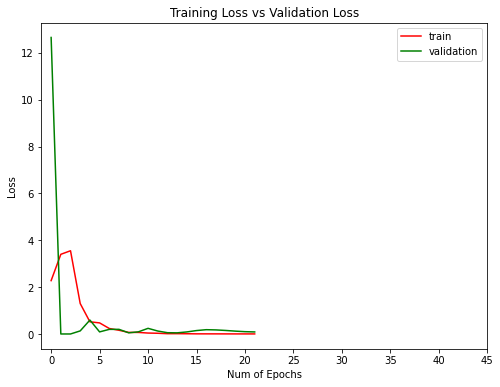

In [19]:
plt.figure(0)  
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history.history['loss'],'r')  
plt.plot(history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

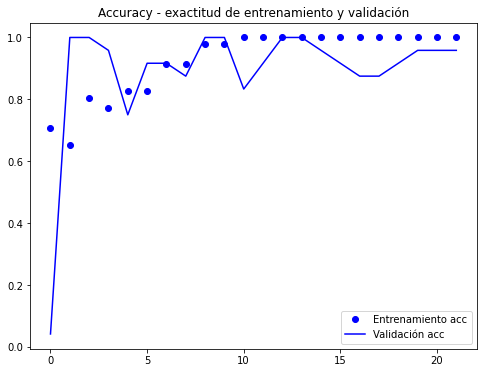

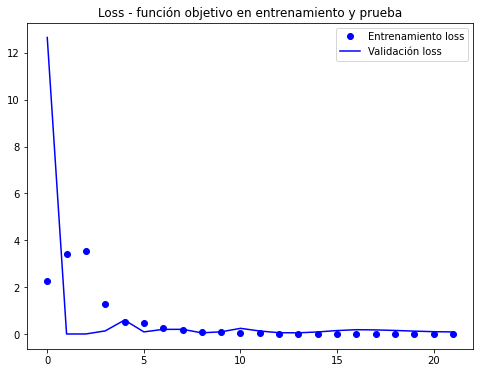

In [20]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

**MATRIZ DE CONFUSIÓN**

4/4 [==============================] - 4s 962ms/step


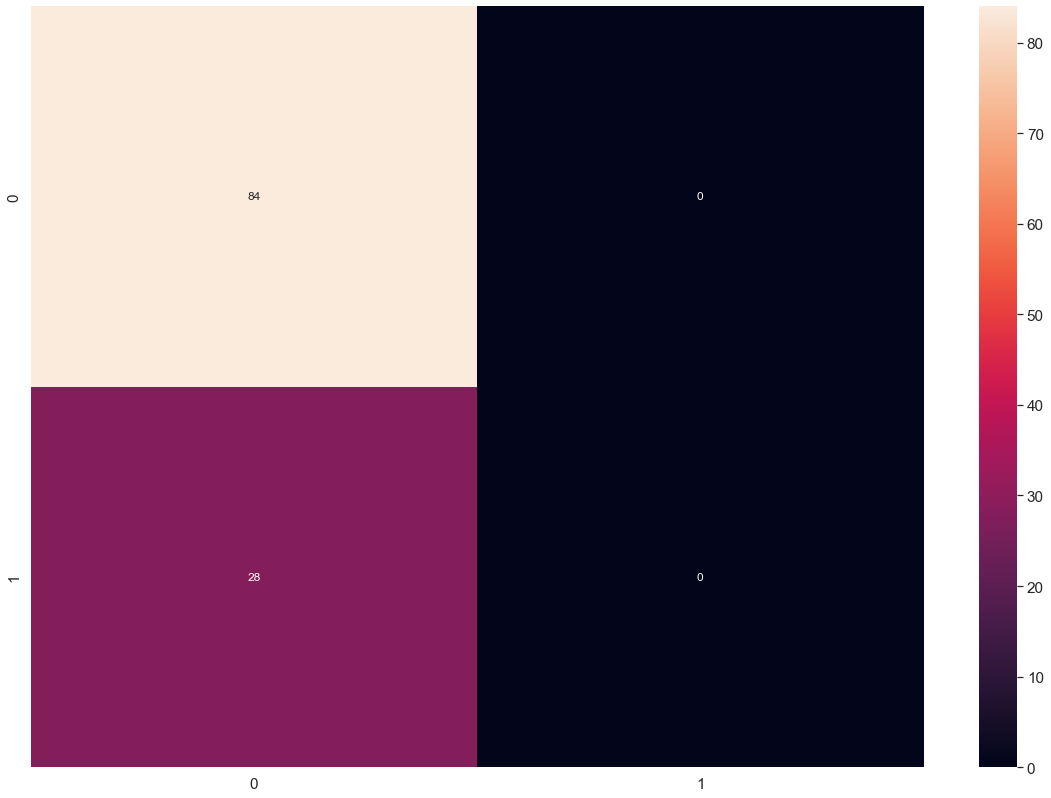

In [21]:
vgg16 = model.predict(test_ds, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16, axis=1)

vgg_cm = confusion_matrix(np.argmax(test_labels, axis=1), vgg16_predicted)

# Visualizing of confusion matrix
vgg_df_cm = pd.DataFrame(vgg_cm, range(2), range(2))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [22]:
vgg_report = classification_report(np.argmax(test_labels, axis=1), vgg16_predicted)  
print(vgg_report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        84
           1       0.00      0.00      0.00        28

    accuracy                           0.75       112
   macro avg       0.38      0.50      0.43       112
weighted avg       0.56      0.75      0.64       112



C:\Users\usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2. TRAIN: OCT / TEST: SAMSUNG

In [35]:
dataset = cargar_datos('Datos EMD/Samsung/EMD', 'Datos EMD/Samsung/NO EMD')

In [36]:
test_ds = dataset[0]

In [37]:
test_labels = dataset[1]

In [38]:
test_labels = to_categorical(test_labels, num_classes=2)

In [26]:
print(len(test_ds)==len(test_labels))

True


In [27]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

In [28]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True)

history2 = model.fit(train_ds, train_labels, epochs=200, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/200
3/3 [==============================] - 5s 1s/step - loss: 3.1980 - accuracy: 0.5543 - val_loss: 0.4891 - val_accuracy: 0.6667
Epoch 2/200
3/3 [==============================] - 4s 2s/step - loss: 0.5491 - accuracy: 0.7283 - val_loss: 0.0991 - val_accuracy: 0.9583
Epoch 3/200
3/3 [==============================] - 4s 2s/step - loss: 0.3795 - accuracy: 0.8370 - val_loss: 0.2215 - val_accuracy: 0.9583
Epoch 4/200
3/3 [==============================] - 4s 2s/step - loss: 0.2416 - accuracy: 0.9565 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 5/200
3/3 [==============================] - 4s 2s/step - loss: 0.1623 - accuracy: 0.9348 - val_loss: 0.0884 - val_accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 4s 2s/step - loss: 0.1025 - accuracy: 0.9674 - val_loss: 0.2469 - val_accuracy: 0.8750
Epoch 7/200
3/3 [==============================] - 4s 2s/step - loss: 0.0714 - accuracy: 0.9891 - val_loss: 0.1642 - val_accuracy: 0.9583
Epoch 8/200
3/3 [=================

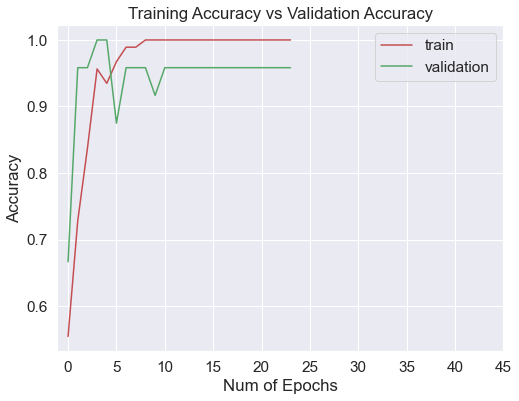

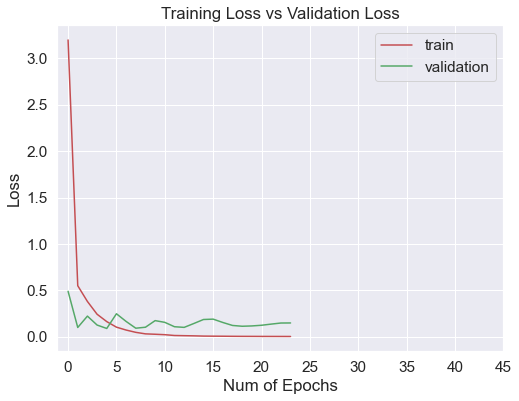

In [30]:
plt.figure(0)  
plt.plot(history2.history['accuracy'],'r')  
plt.plot(history2.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history2.history['loss'],'r')  
plt.plot(history2.history['val_loss'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

4/4 [==============================] - 3s 741ms/step


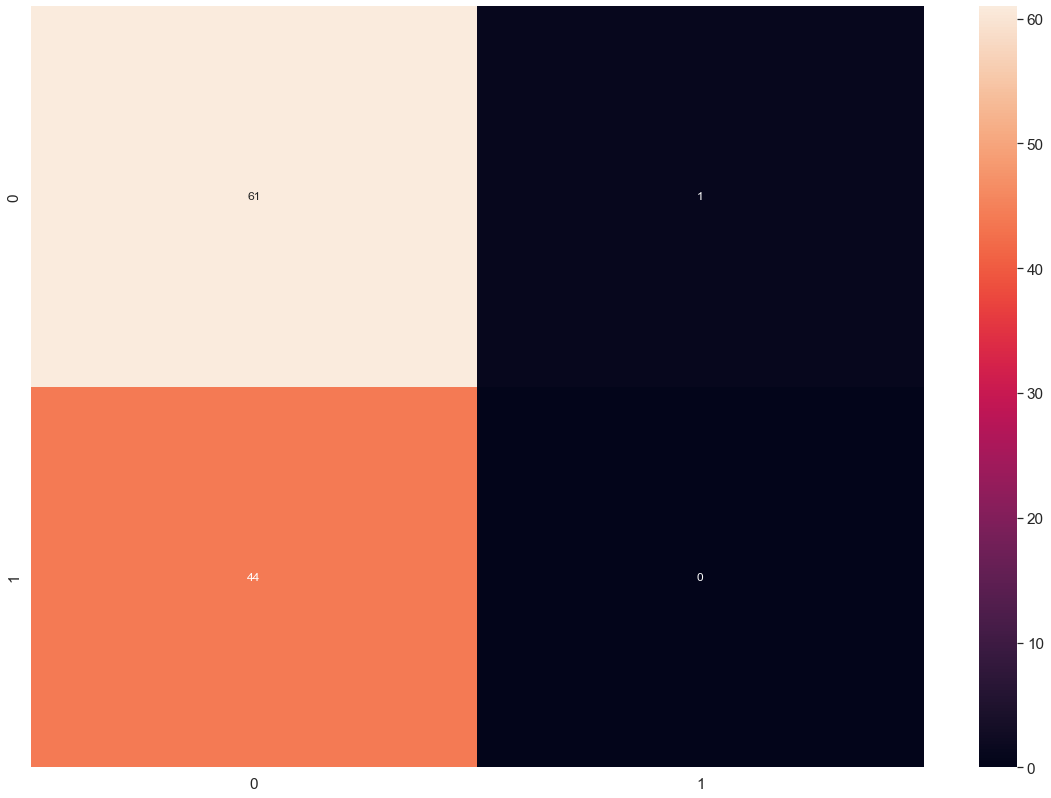

In [41]:
vgg16 = model.predict(test_ds, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16, axis=1)

vgg_cm = confusion_matrix(np.argmax(test_labels, axis=1), vgg16_predicted)

vgg_df_cm = pd.DataFrame(vgg_cm, range(2), range(2))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

# 3. TRAIN: OCT / TEST: iPHONE y SAMSUNG

In [42]:
dataset_iphone = cargar_datos('Datos EMD/iPhone/EMD', 'Datos EMD/iPhone/NO EMD')

In [43]:
dataset_samsung = cargar_datos('Datos EMD/Samsung/EMD', 'Datos EMD/Samsung/NO EMD')

In [45]:
test_ds = np.concatenate((dataset_iphone[0],dataset_samsung[0]))

test_labels = np.concatenate((dataset_iphone[1],dataset_samsung[1]))

In [ ]:
print(len(test_ds)==len(test_labels))

In [53]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True)

history3 = model.fit(train_ds, train_labels, epochs=100, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/100
3/3 [==============================] - 5s 1s/step - loss: 4.9413 - accuracy: 0.7065 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 1.0475 - accuracy: 0.7065 - val_loss: 1.5005 - val_accuracy: 0.5833
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.5425 - accuracy: 0.7717 - val_loss: 0.3178 - val_accuracy: 0.8750
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 0.2792 - accuracy: 0.8913 - val_loss: 0.2125 - val_accuracy: 0.8750
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 0.0840 - accuracy: 0.9674 - val_loss: 0.2537 - val_accuracy: 0.8750
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: 0.0812 - accuracy: 0.9783 - val_loss: 0.1644 - val_accuracy: 0.9583
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9583
Epoch 8/100
3/3 [=================

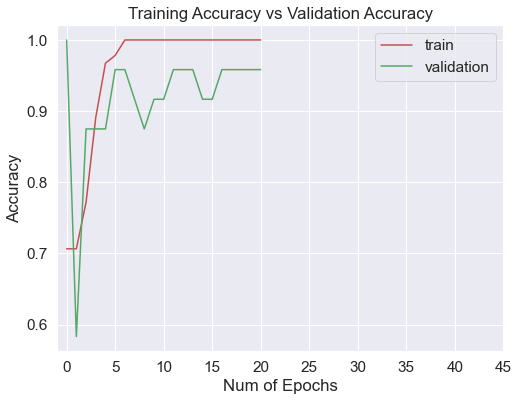

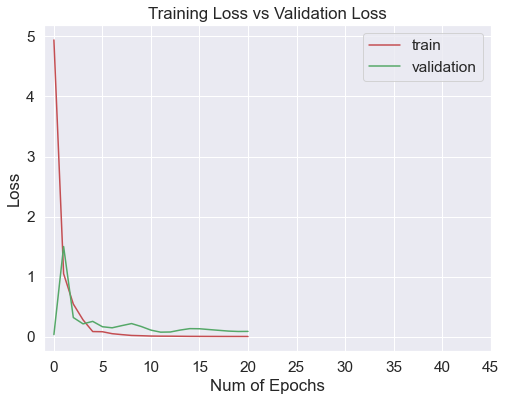

In [55]:
plt.figure(0)  
plt.plot(history3.history['accuracy'],'r')  
plt.plot(history3.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history3.history['loss'],'r')  
plt.plot(history3.history['val_loss'],'g')  
plt.xticks(np.arange(0, 50, 5.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

7/7 [==============================] - 7s 924ms/step


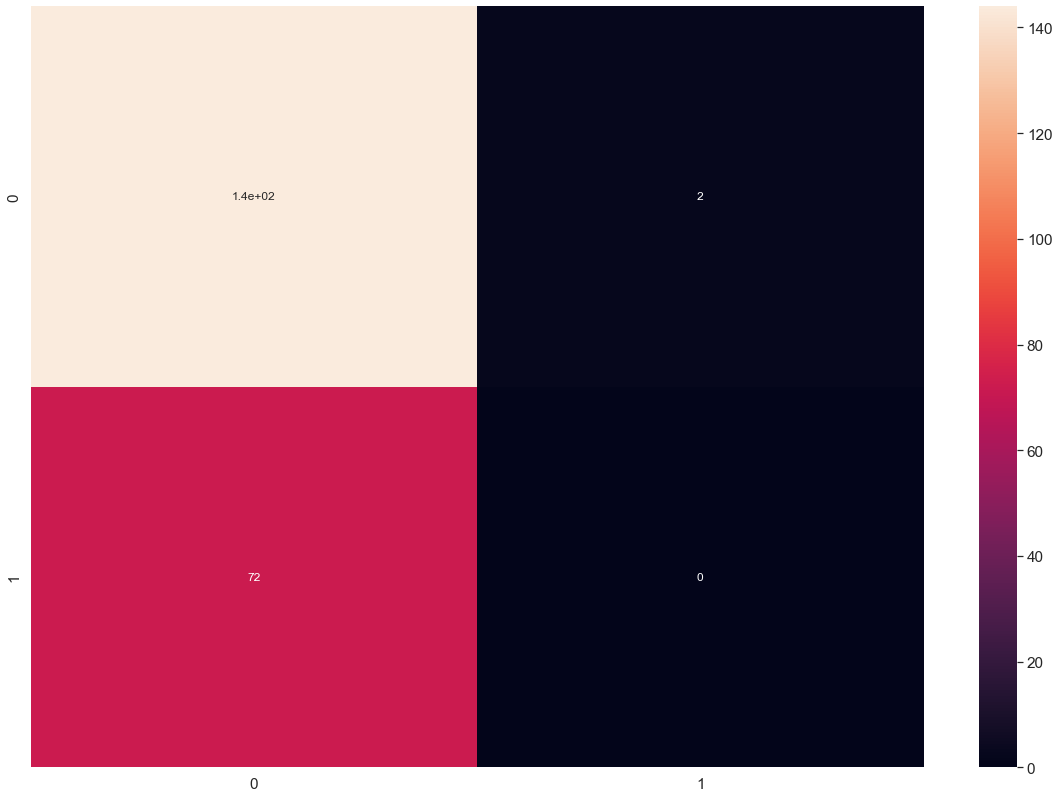

In [56]:
vgg16 = model.predict(test_ds, batch_size=32, verbose=1)  
vgg16_predicted = np.argmax(vgg16, axis=1)

vgg_cm = confusion_matrix(np.argmax(test_labels, axis=1), vgg16_predicted)

vgg_df_cm = pd.DataFrame(vgg_cm, range(2), range(2))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(vgg_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  